# Import Libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("Breast_cancer_data.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
data.shape

(569, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [6]:
data.isnull().sum()


mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

# Basic EDA 

<AxesSubplot:>

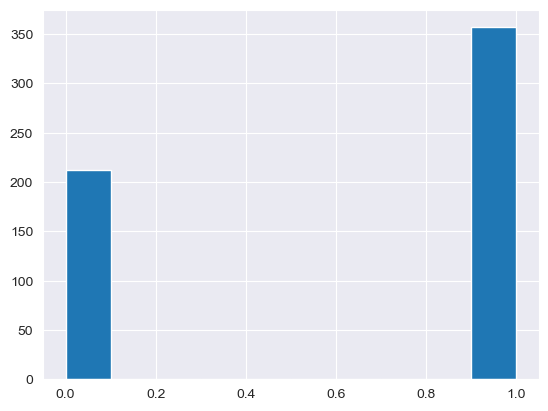

In [7]:
sns.set_style("darkgrid")
data['diagnosis'].hist()

<AxesSubplot:>

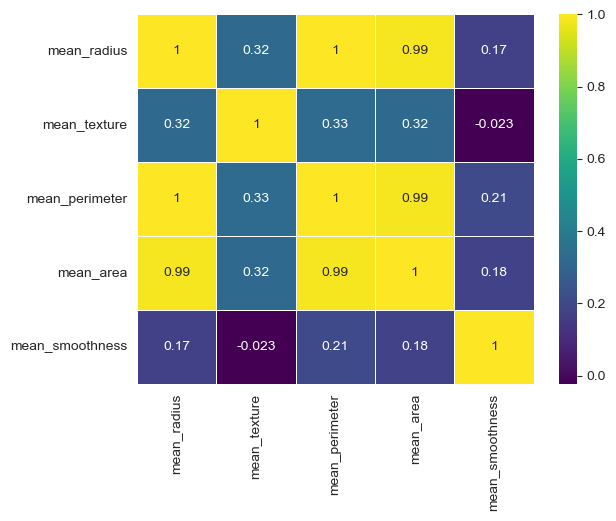

In [8]:
corr=data.drop("diagnosis",axis=1).corr(method="pearson")
sns.heatmap(corr,linewidth=0.5,annot=True,cmap="viridis")

In [9]:
df=data.drop(["mean_perimeter","mean_area"],axis=1)
df.head()

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


<AxesSubplot:xlabel='mean_smoothness', ylabel='Count'>

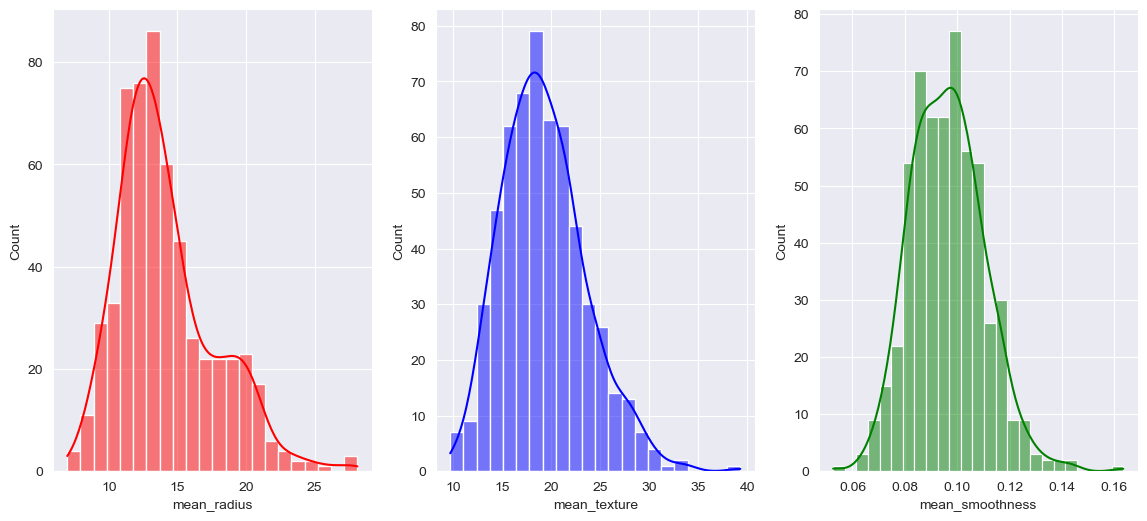

In [10]:
fig,axes=plt.subplots(1,3,figsize=(14,6))
sns.histplot(df,x="mean_radius",ax=axes[0],kde=True,color="r")
sns.histplot(df,x="mean_texture",ax=axes[1],kde=True,color="b")
sns.histplot(df,x="mean_smoothness",ax=axes[2],kde=True,color="g")



# Naive Bayes Formula 

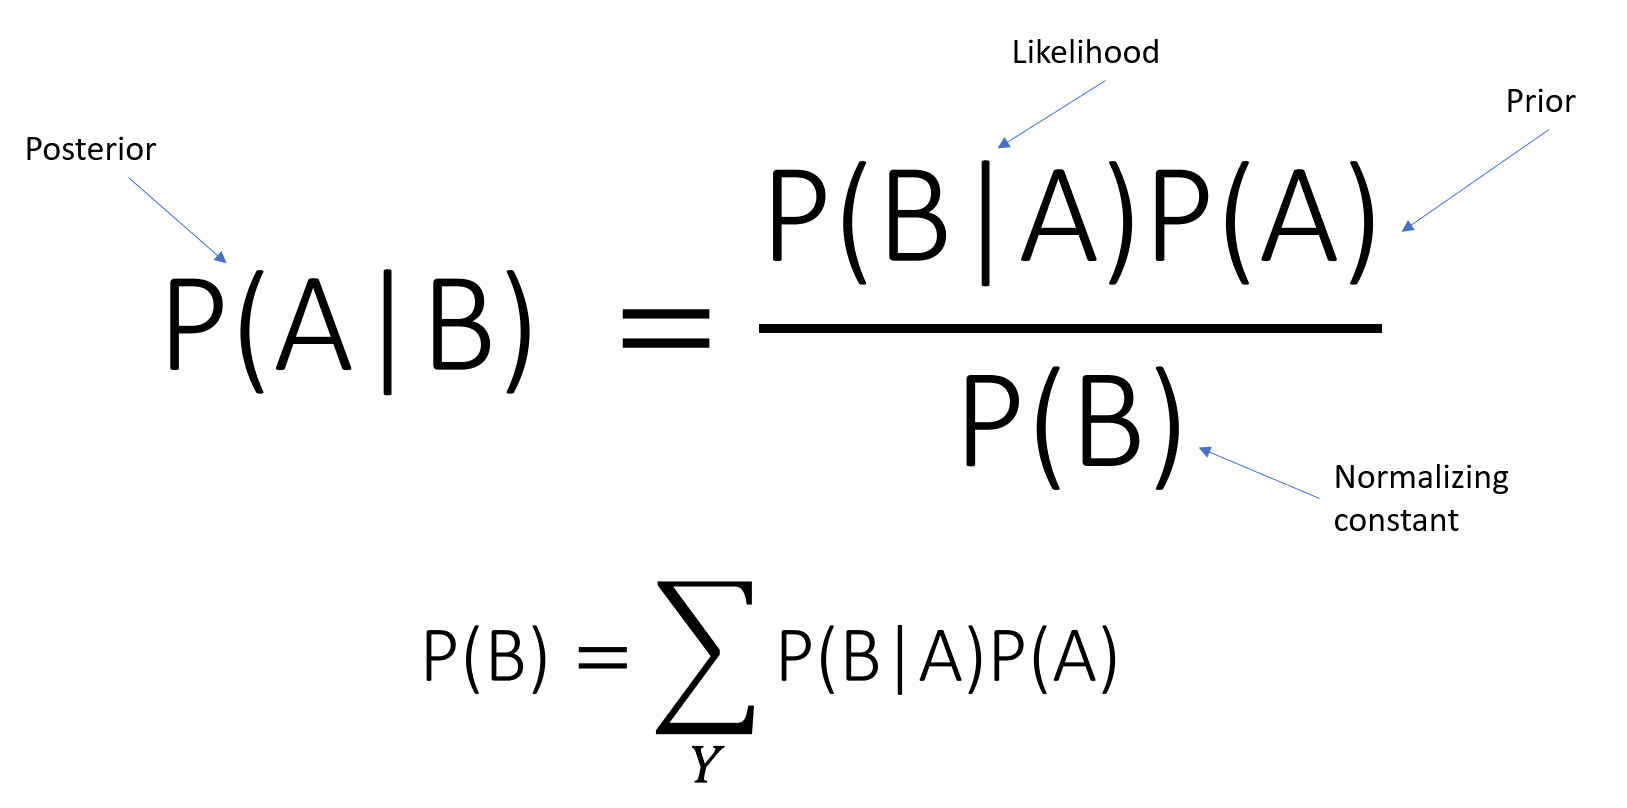

In [11]:
def calculate_prior(df,Y):
    classes = sorted(list(df[Y].unique()))
    prior=[]
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

    
    

# Calculate P(Xi/Y) using gaussian distribution 

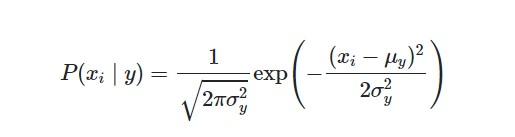

In [12]:
def calculate_likelihood_gaussian(df,feat_name,feat_val,Y,label):
    feat=list(df.columns)
    df=df[df[Y]==label]
    mean=df[feat_name].mean()
    std=df[feat_name].std()
    p_x_given_y = (1/(np.sqrt(2*np.pi)*std)) * np.exp(-((feat_val-mean)**2)/(2*(std**2)))
    return p_x_given_y

## Calculate P(x=x1|Y=y)P(x=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [13]:
def naive_bayes_gaussian(df,X,Y):
    # get feature names
    features = list(df.columns)[:-1]
    # calculate prior
    prior = calculate_prior(df, Y)
    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df,features[i],x[i],Y,labels[j])
        #calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
            
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

# Test Gaussian model 

[[39  4]
 [ 2 69]]
0.9583333333333334


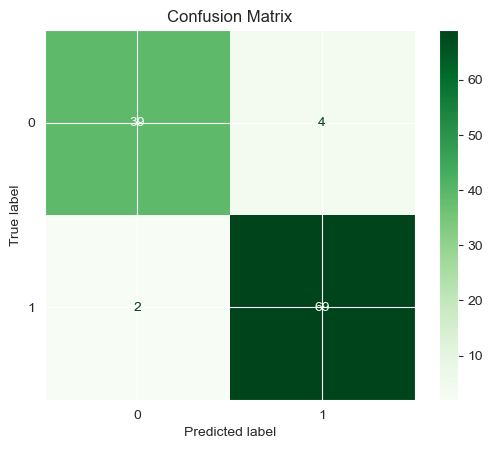

In [14]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=42)
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train,X=X_test,Y="diagnosis")
from sklearn.metrics import confusion_matrix, f1_score,ConfusionMatrixDisplay
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test,Y_pred))
gaussian_cm=confusion_matrix(Y_test, Y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=gaussian_cm,display_labels=df['diagnosis'].unique())
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.show()

# Convert Continuous features to categorical features 

In [15]:
df["cat_mean_radius"]=pd.cut(df["mean_radius"].values,bins=3,labels=[0,1,2])
df["cat_mean_texture"] = pd.cut(df["mean_texture"].values,bins=3,labels=[0,1,2])
df["cat_mean_smoothness"] = pd.cut(df["mean_smoothness"].values,bins = 3,labels =[0,1,2])
df = df.drop(columns=["mean_radius","mean_texture","mean_smoothness"])
df = df[["cat_mean_radius","cat_mean_texture","cat_mean_smoothness","diagnosis"]]
df.head(10)

,cat_mean_radius,cat_mean_texture,cat_mean_smoothness,diagnosis
0,1,0,1,0
1,1,0,0,0
2,1,1,1,0
3,0,1,2,0
4,1,0,1,0
5,0,0,2,0
6,1,1,1,0
7,0,1,1,0
8,0,1,2,0
9,0,1,1,0


In [16]:
def calculate_likelihood_categorical(df,feat_name,feat_val,Y,label):
    feat=list(df.columns)
    df=df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val])/len(df)
    return p_x_given_y

In [17]:
def naive_bayes_categorical(df,X,Y):
    # get feature names
    features = list(df.columns)[:-1]
    # calculate prior
    prior = calculate_prior(df, Y)
    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df,features[i],x[i],Y,labels[j])
        #calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
            
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

# Test Categorical model

0.9078014184397163
[[37  6]
 [ 7 64]]


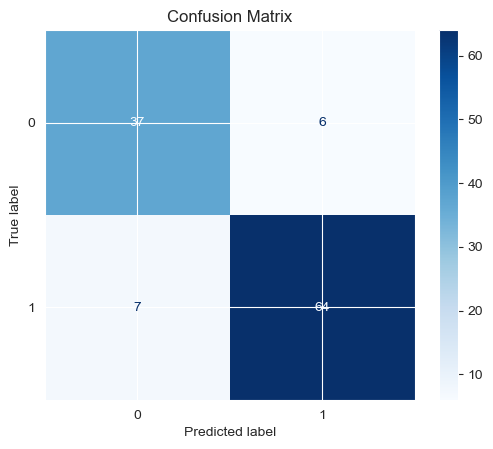

In [18]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=42)
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train,X=X_test,Y="diagnosis")
from sklearn.metrics import confusion_matrix, f1_score,ConfusionMatrixDisplay
print(f1_score(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))
categorical_cm=confusion_matrix(Y_test, Y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=categorical_cm,display_labels=df['diagnosis'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
